In [1]:
from datasets import load_dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AADESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AADESH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AADESH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
cache_dir = "./data_cache"

train_dataset = load_dataset(
    "tweet_eval",
    name="emotion",
    split="train",
    cache_dir=cache_dir,
)
print(f"Training dataset with {len(train_dataset)} instances loaded")


val_dataset = load_dataset(
    "tweet_eval",
    name="emotion",
    split="validation",
    cache_dir=cache_dir,
)
print(f"Development/validation dataset with {len(val_dataset)} instances loaded")


test_dataset = load_dataset(
    "tweet_eval",
    name="emotion",
    split="test",
    cache_dir=cache_dir,
)
print(f"Test dataset with {len(test_dataset)} instances loaded")

# Access the input text and target labels like this...
train_texts = train_dataset['text']
train_labels = train_dataset['label']

val_texts = val_dataset['text']
val_labels = val_dataset['label']

test_texts = test_dataset['text']
test_labels = test_dataset['label']

Training dataset with 3257 instances loaded
Development/validation dataset with 374 instances loaded
Test dataset with 1421 instances loaded


In [3]:
from datasets import load_dataset
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer

# Stopwords and lemmatizer setup
stop_words = set(stopwords.words('english'))
stop_words.update(['amp','u'])
lemmatizer = WordNetLemmatizer()

# Function to preprocess texts
# Cleaning text data
def clean_text(text):
    lemmatiser = WordNetLemmatizer()
    # Remove URLs
    cleaned_text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove user mentions
    cleaned_text = re.sub(r'@\w+', '', cleaned_text)
    # Remove non-alphanumeric characters and numbers
    cleaned_text = re.sub(r'\W+|\d+', ' ', cleaned_text)
    # Remove single characters
    cleaned_text = re.sub(r'\s+[a-zA-Z]\s+', ' ', cleaned_text)
    # Tokenize and remove stop words
    text_tokens = nltk.word_tokenize(cleaned_text)
    cleaned_text = ' '.join([lemmatiser.lemmatize(word.lower()) for word in text_tokens if word.lower() not in stop_words])
    # Remove extra whitespace
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text

def preprocess_texts(texts):
    return [clean_text(text) for text in texts]

def load_preprocess_data():
    processed_train_texts = preprocess_texts(train_texts)
    all_tokens = [token for text in processed_train_texts for token in text.split()]
    freq_dist = FreqDist(all_tokens)
    return processed_train_texts, freq_dist

processed_train_texts, freq_dist = load_preprocess_data()

most_common_words = freq_dist.most_common(50)
print(most_common_words)

[('like', 236), ('get', 182), ('people', 142), ('one', 124), ('day', 110), ('time', 106), ('know', 106), ('make', 102), ('think', 100), ('got', 96), ('go', 96), ('would', 91), ('love', 91), ('want', 91), ('sad', 91), ('life', 89), ('really', 88), ('even', 84), ('back', 81), ('feel', 80), ('going', 76), ('need', 76), ('good', 75), ('still', 74), ('today', 73), ('fear', 70), ('see', 70), ('someone', 69), ('depression', 68), ('angry', 67), ('never', 66), ('look', 66), ('thing', 66), ('work', 65), ('say', 65), ('fucking', 63), ('way', 63), ('much', 63), ('year', 62), ('lost', 62), ('right', 62), ('watch', 61), ('new', 59), ('anger', 58), ('let', 58), ('sadness', 57), ('man', 54), ('terrorism', 54), ('guy', 52), ('im', 52)]


In [4]:
#func for preprocess and tokenise
def preprocess_tokenise(texts,labels,target_label):
    filtered_texts = [texts[i] for i in range(len(texts)) if labels[i]==target_label]
    processed_texts = preprocess_texts(filtered_texts)
    tokenised_texts = [word_tokenize(text) for text in processed_texts]
    return tokenised_texts

In [13]:
# lda and visualisation
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
def lda_visualise(tokenised_texts, num_topics = 5, emotion_name="Emotion"):
    dictionary = Dictionary(tokenised_texts)
    corpus= [dictionary.doc2bow(text) for text in tokenised_texts]
    
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=1,passes=10)
    
    # TOPICS
    topics= lda_model.print_topics(num_words=10)
    for topic in topics:
        print(topic)
        
    #visualisation
    for idx,topic in lda_model.show_topics(formatted=False):
        wc=WordCloud(width=800,height=400, background_color='white').generate_from_frequencies(dict(topic))
        plt.figure(figsize=(10,8))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic #{idx+1} - {emotion_name}')
        plt.show()

(0, '0.011*"good" + 0.007*"quote" + 0.007*"worry" + 0.006*"god" + 0.006*"optimism" + 0.006*"right" + 0.006*"life" + 0.006*"negative" + 0.006*"bad" + 0.006*"come"')
(1, '0.012*"worry" + 0.011*"know" + 0.010*"like" + 0.009*"fear" + 0.007*"good" + 0.007*"anxiety" + 0.006*"milk" + 0.006*"someone" + 0.006*"let" + 0.005*"people"')
(2, '0.012*"make" + 0.010*"fear" + 0.008*"life" + 0.008*"wrong" + 0.007*"look" + 0.007*"never" + 0.006*"start" + 0.005*"still" + 0.005*"voice" + 0.005*"source"')
(3, '0.011*"get" + 0.009*"never" + 0.008*"worry" + 0.008*"gt" + 0.007*"start" + 0.005*"go" + 0.005*"way" + 0.005*"life" + 0.005*"like" + 0.005*"szn"')
(4, '0.016*"fear" + 0.010*"optimism" + 0.009*"want" + 0.007*"every" + 0.007*"let" + 0.007*"see" + 0.006*"better" + 0.006*"quote" + 0.006*"really" + 0.006*"get"')


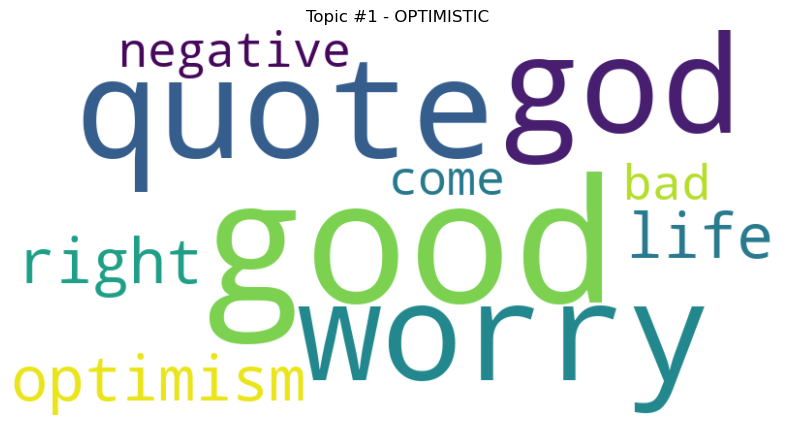

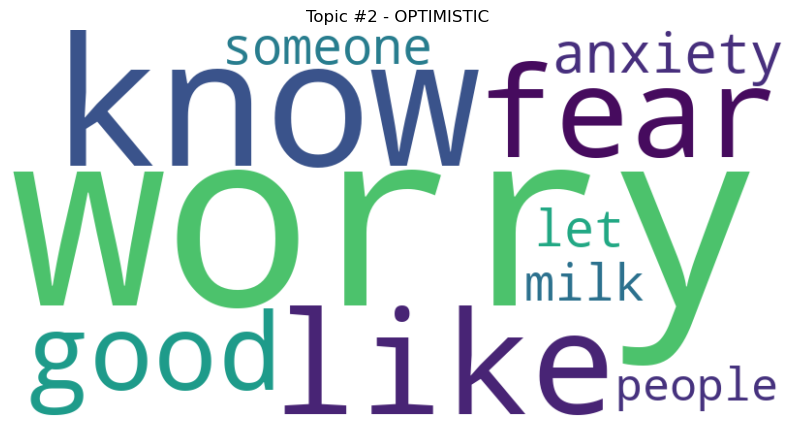

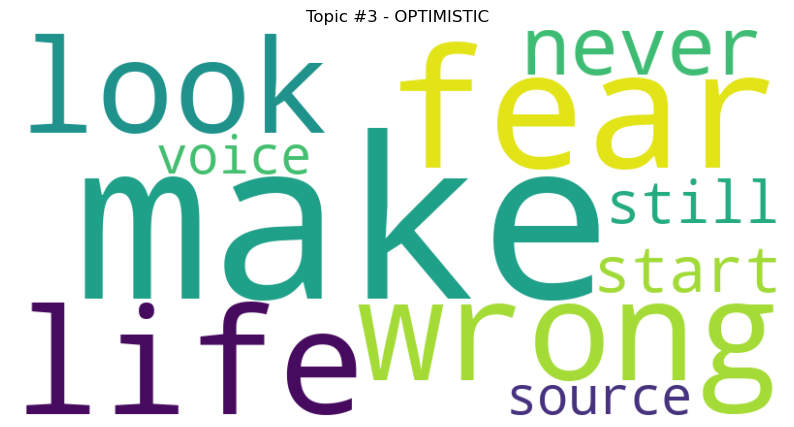

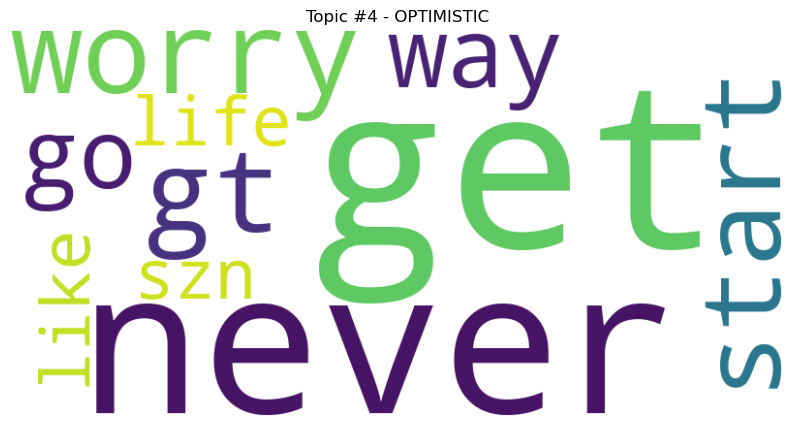

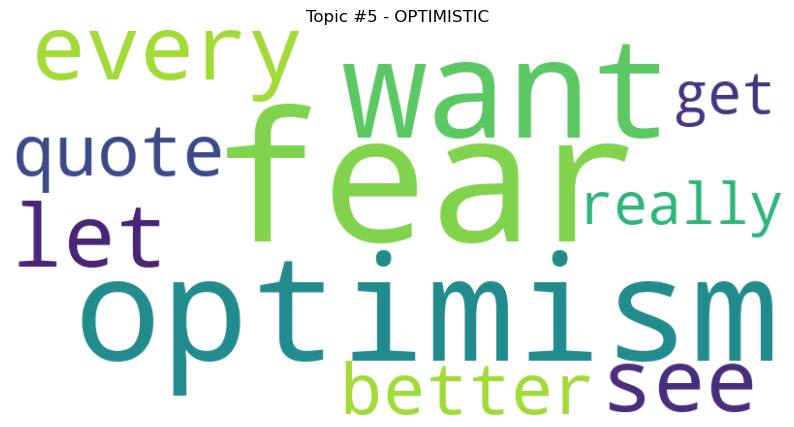

(0, '0.011*"hilarious" + 0.011*"like" + 0.007*"know" + 0.005*"lol" + 0.005*"going" + 0.005*"blue" + 0.004*"thought" + 0.004*"get" + 0.004*"game" + 0.004*"need"')
(1, '0.008*"blue" + 0.006*"breezy" + 0.005*"night" + 0.005*"sober" + 0.005*"want" + 0.005*"really" + 0.005*"love" + 0.004*"one" + 0.004*"happy" + 0.003*"hilarity"')
(2, '0.015*"watch" + 0.015*"amazing" + 0.013*"live" + 0.013*"ly" + 0.013*"broadcast" + 0.013*"musically" + 0.011*"love" + 0.007*"lively" + 0.007*"time" + 0.005*"glee"')
(3, '0.014*"day" + 0.008*"one" + 0.006*"get" + 0.006*"still" + 0.006*"hilarious" + 0.005*"boy" + 0.005*"look" + 0.005*"lol" + 0.005*"love" + 0.005*"like"')
(4, '0.012*"happy" + 0.007*"birthday" + 0.006*"new" + 0.006*"day" + 0.006*"u" + 0.006*"love" + 0.005*"cheer" + 0.005*"n" + 0.005*"good" + 0.004*"year"')


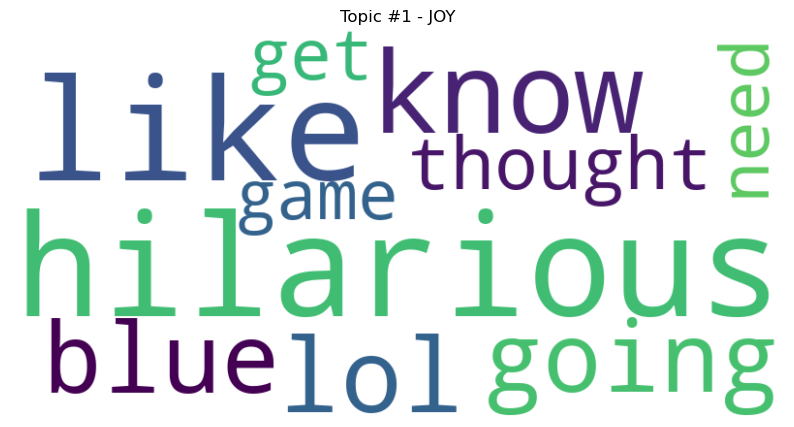

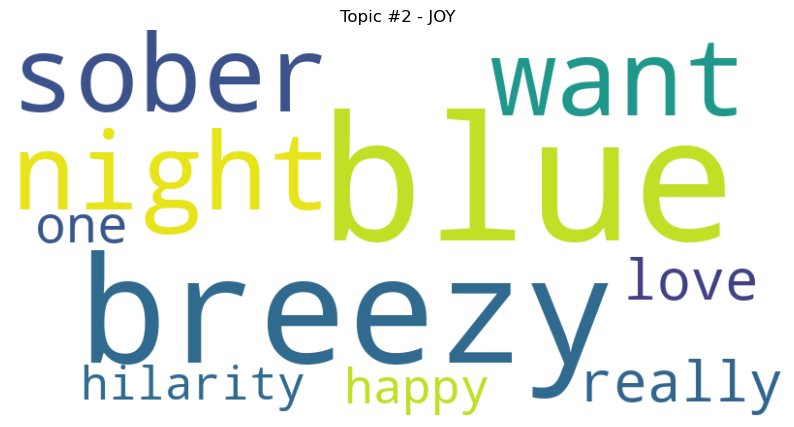

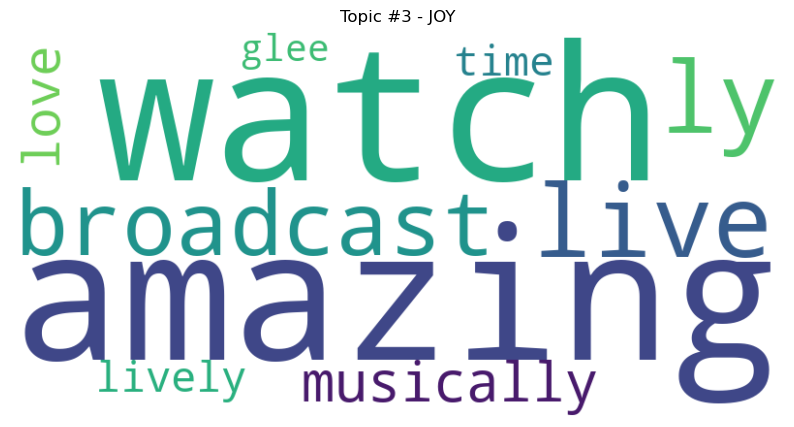

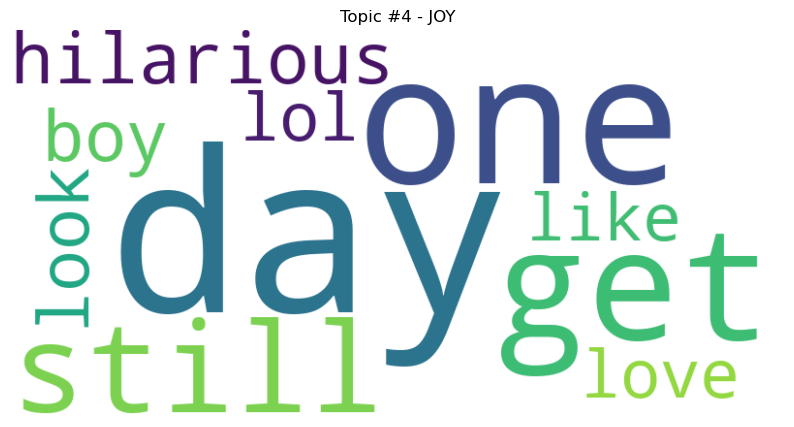

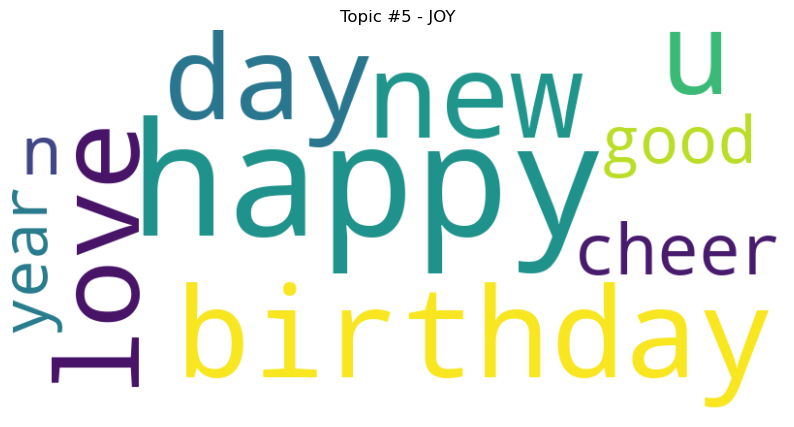

In [14]:
joy_texts = preprocess_tokenise(train_texts,train_labels,1) #1 being label for joy
optimism_texts = preprocess_tokenise(train_texts,train_labels,2)#2 being label for optimism

#print('Joy Topics')
lda_visualise(optimism_texts, emotion_name='OPTIMISTIC')

#print('Joy Topics')
lda_visualise(joy_texts, emotion_name='JOY')